In [1]:
import data_setup , engine , utils
import torch.nn as nn
import torch
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

E:\Anaconda\envs\pytorch39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Device agnostic code.

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Making train test dir.

In [3]:
train_dir = "E://Image Dataset/happy sad/train"
test_dir = "E://Image Dataset/happy sad/validation"
print(f"[INFO] : train_dir = {train_dir} \n test_dir = {test_dir}")

[INFO] : train_dir = E://Image Dataset/happy sad/train 
 test_dir = E://Image Dataset/happy sad/validation


# Making Effnetb2 Model.

In [4]:
def create_effenetb2(num_classes :int):
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    model = torchvision.models.efficientnet_b2(weights = weights)
    transform = weights.transforms()

    for param in model.features.parameters():
        param.requires_grad = False
    
    num_ftrs = model.classifier[1].in_features

    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3 , inplace=True),
        nn.Linear(in_features=num_ftrs , out_features=num_classes)
    )
    return model , transform

# Summary of the model.

In [5]:
model , data_transform = create_effenetb2(2)
summary(model = model,
        input_size=(32,3,224,224),
        col_names=['input_size','output_size','num_params','trainable',],
        col_width=20,
        row_settings=['var_names'])

E:\Anaconda\envs\pytorch39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
E:\Anaconda\envs\pytorch39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1408, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

# Making DataLoaders.

In [6]:
train_dataloader , test_dataloader , class_names = data_setup.create_dataloaders(train_dir,
                                                                                 test_dir,
                                                                                 data_transform,
                                                                                 batch_size = 32)
print(class_names)

['happy', 'sad']


# Training

In [7]:
epochs = 10
optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

effnet_results = engine.train(model = model,
                        train_dataloader=train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer=optimizer,
                        loss_fn = loss_fn,
                        epochs=epochs,
                        device = device)

 10%|████████▎                                                                          | 1/10 [00:59<08:58, 59.79s/it]

Epoch: 1 | train_loss: 0.6717 | train_acc: 0.5521 | test_loss: 0.6483 | test_acc: 0.6725


 20%|████████████████▌                                                                  | 2/10 [01:53<07:27, 55.95s/it]

Epoch: 2 | train_loss: 0.5472 | train_acc: 0.7904 | test_loss: 0.6035 | test_acc: 0.6994


 30%|████████████████████████▉                                                          | 3/10 [02:27<05:22, 46.10s/it]

Epoch: 3 | train_loss: 0.4902 | train_acc: 0.8346 | test_loss: 0.5721 | test_acc: 0.6950


 40%|█████████████████████████████████▏                                                 | 4/10 [03:01<04:08, 41.34s/it]

Epoch: 4 | train_loss: 0.4364 | train_acc: 0.8490 | test_loss: 0.5498 | test_acc: 0.7037


 50%|█████████████████████████████████████████▌                                         | 5/10 [03:59<03:56, 47.39s/it]

Epoch: 5 | train_loss: 0.3799 | train_acc: 0.8919 | test_loss: 0.5279 | test_acc: 0.7306


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [04:37<02:56, 44.20s/it]

Epoch: 6 | train_loss: 0.3711 | train_acc: 0.9115 | test_loss: 0.5231 | test_acc: 0.7375


 70%|██████████████████████████████████████████████████████████                         | 7/10 [05:03<01:54, 38.26s/it]

Epoch: 7 | train_loss: 0.3277 | train_acc: 0.9180 | test_loss: 0.4992 | test_acc: 0.8063


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [05:23<01:04, 32.38s/it]

Epoch: 8 | train_loss: 0.3251 | train_acc: 0.8776 | test_loss: 0.4931 | test_acc: 0.8106


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [05:42<00:28, 28.27s/it]

Epoch: 9 | train_loss: 0.3142 | train_acc: 0.8893 | test_loss: 0.4676 | test_acc: 0.8306


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:01<00:00, 36.14s/it]

Epoch: 10 | train_loss: 0.3211 | train_acc: 0.9128 | test_loss: 0.4777 | test_acc: 0.8131


# Plotting Curves

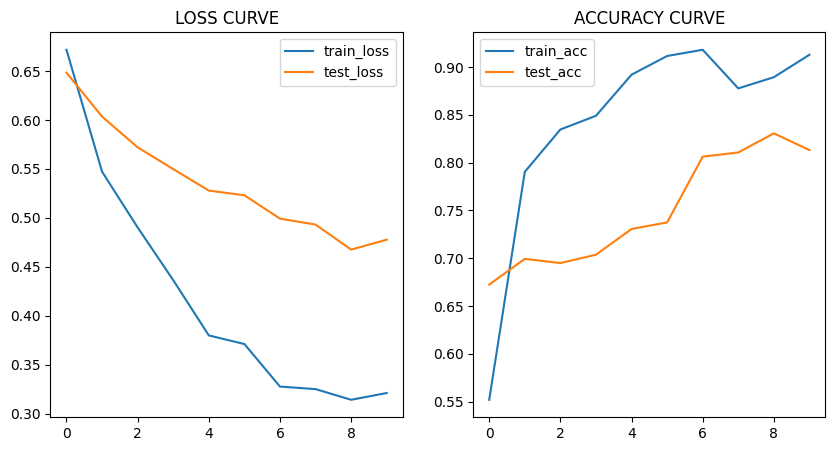

In [8]:
epochs = range(len(effnet_results["train_loss"]))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs , effnet_results['train_loss'],label = "train_loss")
plt.plot(epochs,effnet_results['test_loss'] , label = "test_loss")
plt.title("LOSS CURVE")
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, effnet_results['train_acc'],label = "train_acc")
plt.plot(epochs, effnet_results['test_acc'] , label = "test_acc")
plt.title("ACCURACY CURVE")
plt.legend()

# Saving the model

In [9]:
utils.save_model(model = model , target_dir = "model" , model_name="effnetb2.pth")

[INFO] Saving model to: model\effnetb2.pth


# Loading the model

In [10]:
effentb2 , effnet_transforms = create_effenetb2(2)
effentb2.load_state_dict(
    torch.load(f="model/effnetb2.pth",
               map_location=torch.device("cpu"))
)

<All keys matched successfully>

# Predict The image.

In [11]:
from timeit import default_timer as timer 
def predict(img):
    start_time = timer()
    

    img = effnet_transforms(img).unsqueeze(0)
    
    effentb2.eval()
    with torch.inference_mode():
        pred_probs = torch.softmax(effentb2(img), dim=1)
    
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    

    pred_time = round(timer() - start_time, 5)
    
    return pred_labels_and_probs, pred_time

# Gradio

In [16]:
import gradio as gr

# Create title, description and article strings
title = "Happy Sad Classification 🙂😟"
description = "An EffnetB2 feature extractor computer vision model to classify images of happy and sad people."
article = "Created at Sarthak Samantaray"

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=2, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7866
Running on public URL: https://bd571259140f2fb96e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


ReadTimeout: HTTPSConnectionPool(host='bd571259140f2fb96e.gradio.live', port=443): Read timed out. (read timeout=3)

# Plotting Predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


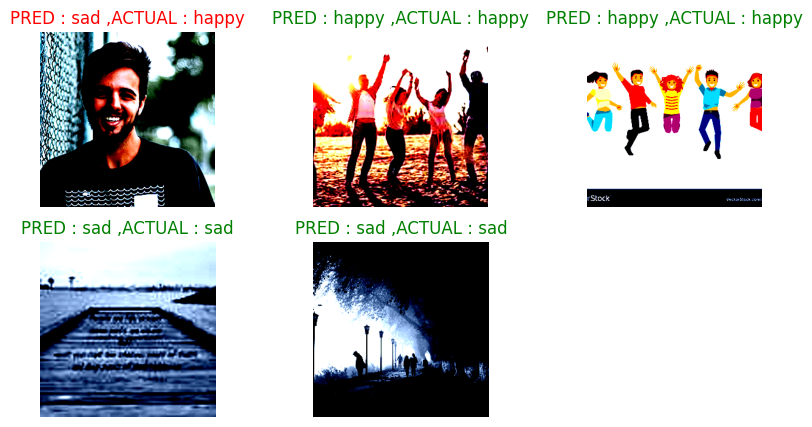

In [13]:
import numpy as np
from pathlib import Path
import random
from PIL import Image

test_data_paths = list(Path(test_dir).glob("*/*.jpg"))
random_image_path = random.sample(test_data_paths, k=5)

plt.figure(figsize = (10,5))
for i,images in enumerate(random_image_path):
    class_names = class_names
    actual_classes = images.parent.stem
    plt.subplot(2,3,i+1)
    img = Image.open(images)
    
    model = effentb2
    model.eval()
    with torch.inference_mode():
        img = effnet_transforms(img)
        img = img.unsqueeze(dim=0)
        
        y_pred = model(img)
        y_pred_probs = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        y_pred_classes = class_names[y_pred_probs]
        
        plt.imshow(img.squeeze().permute(1,2,0))
        plt.title(f"PRED : {y_pred_classes} ,ACTUAL : {actual_classes}",c = "green" if y_pred_classes == actual_classes else "red")
        plt.axis('off')